In [3]:
import math
from math import sqrt,log10, pow

from plot_intersections import plot_intersections, plot_segments


import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import pathlib
import tikzplotlib

from collections import defaultdict


In [4]:
def read_jsons(folders=[]):

    data = []
    # Read jsons files of build/semana03/circles with pathlib
    jsons = []
    for folder in folders:
        jsons += list(pathlib.Path(folder).glob("*.json"))
    
    jsons.sort()
    
    for json_file in jsons:
        print(json_file)
        with open(json_file, "r") as f:
            json_values = json.load(f)
            data.append(json_values)

    df = pd.DataFrame(data)
    df["case"] = df["container"] + "_" + df["event_container"]
    return df



In [40]:
dfs = []
df_pequenos = read_jsons(["../build/semana06/plot_01/"])
dfs.append(df_pequenos)

df_grandes = read_jsons(["../build/semana06/plot_big/"])
dfs.append(df_grandes)

df_grid = read_jsons(["../build/semana06/plot_grid/"])
dfs.append(df_grid)

df_random = read_jsons(["../build/semana06/plot_random_bkp/"])
dfs.append(df_grid)

df = pd.concat(dfs)


../build/semana06/plot_01/nointersect_avl_list_1000000_1.json
../build/semana06/plot_01/nointersect_avl_list_1000000_2.json
../build/semana06/plot_01/nointersect_avl_list_1000000_3.json
../build/semana06/plot_01/nointersect_avl_list_100000_1.json
../build/semana06/plot_01/nointersect_avl_list_100000_2.json
../build/semana06/plot_01/nointersect_avl_list_100000_3.json
../build/semana06/plot_01/nointersect_avl_list_10000_1.json
../build/semana06/plot_01/nointersect_avl_list_10000_2.json
../build/semana06/plot_01/nointersect_avl_list_10000_3.json
../build/semana06/plot_01/nointersect_avl_list_1000_1.json
../build/semana06/plot_01/nointersect_avl_list_1000_2.json
../build/semana06/plot_01/nointersect_avl_list_1000_3.json
../build/semana06/plot_01/nointersect_avl_list_100_1.json
../build/semana06/plot_01/nointersect_avl_list_100_2.json
../build/semana06/plot_01/nointersect_avl_list_100_3.json
../build/semana06/plot_01/nointersect_avl_list_10_1.json
../build/semana06/plot_01/nointersect_avl_l

In [9]:
default_palette = sns.color_palette("Dark2")


sns.set_theme(style="whitegrid")
hue_categories = df.container.unique()  
hue_colors = {category: color for category, color in zip(hue_categories, default_palette)}


## Sem interseção pequenos
 
 


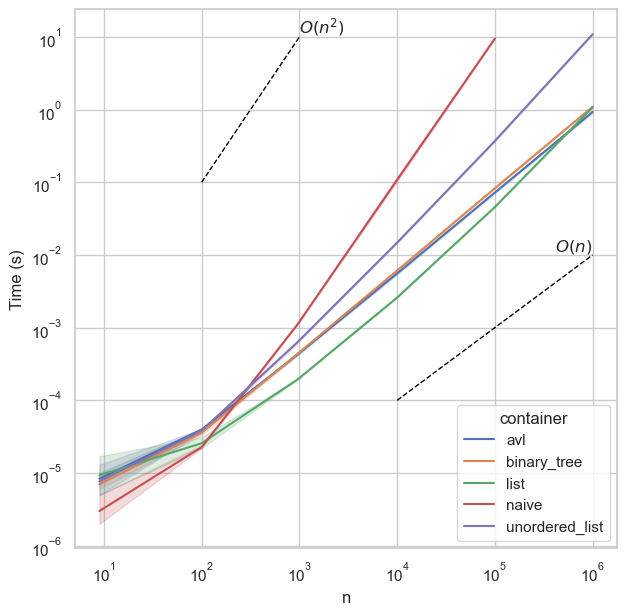

In [38]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sns.lineplot(data=df_pequenos, x="n", y="time", hue="container", ax=ax)

ax.set(xscale="log", yscale="log")
ax.set_ylabel("Time (s)")

y = 1e-1
xs = [100, 1000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*2)]


ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

y = 1e-4
xs = [10000, 1000000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*1)]

ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom", horizontalalignment="right")

plt.savefig("./tex/figs/plot_small_detection_time.pdf")
plt.show()


## Segmentos grandes sem interseção

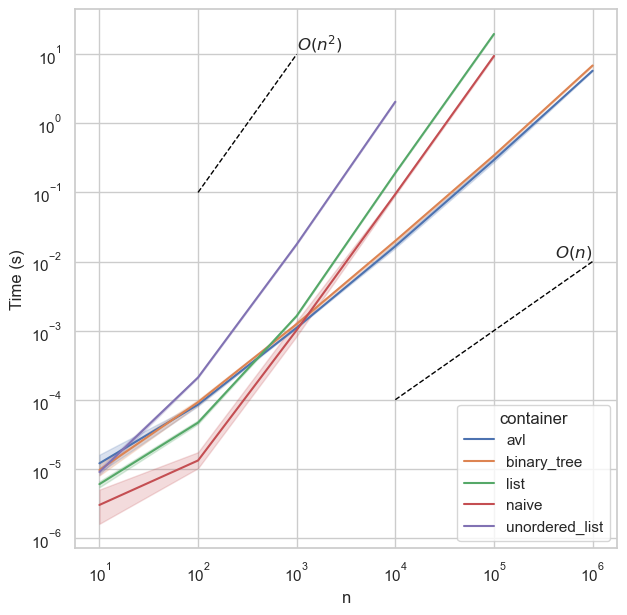

In [41]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sns.lineplot(data=df_grandes, x="n", y="time", hue="container", ax=ax)

ax.set(xscale="log", yscale="log")
ax.set_ylabel("Time (s)")

y = 1e-1
xs = [100, 1000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*2)]


ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

y = 1e-4
xs = [10000, 1000000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*1)]

ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom", horizontalalignment="right")

plt.savefig("./tex/figs/plot_big_detection_time.pdf")
plt.show()


## Grid Tests

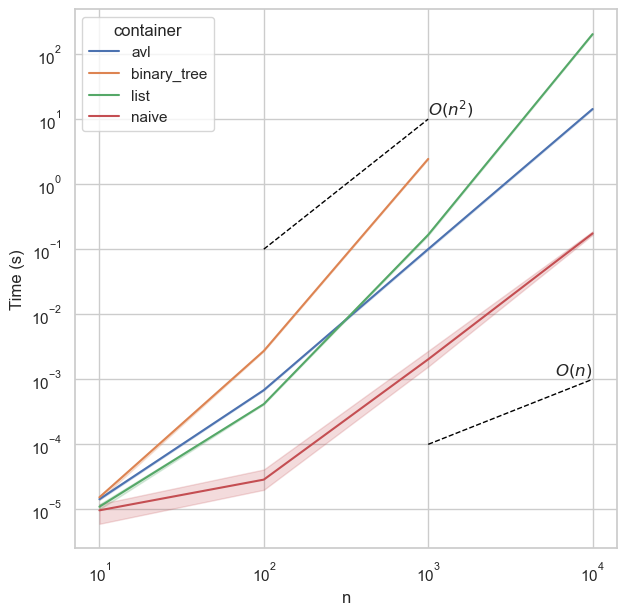

In [11]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sns.lineplot(data=df_grid[df_grid.event_container=="heap"], x="n", y="time", hue="container", ax=ax)

ax.set(xscale="log", yscale="log")
ax.set_ylabel("Time (s)")

y = 1e-1
xs = [100, 1000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*2)]

ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

y = 1e-4
xs = [1000, 10000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*1)]

ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom", horizontalalignment="right")

plt.savefig("./tex/figs/plot_grid_time.pdf")
plt.show()


# Random Plots


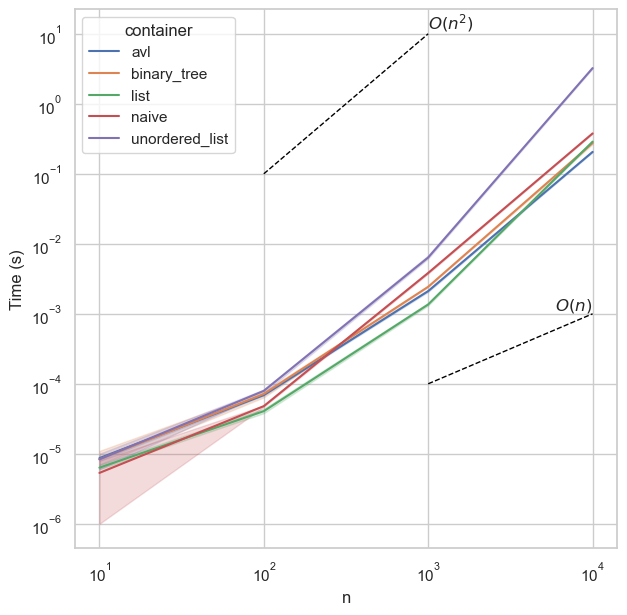

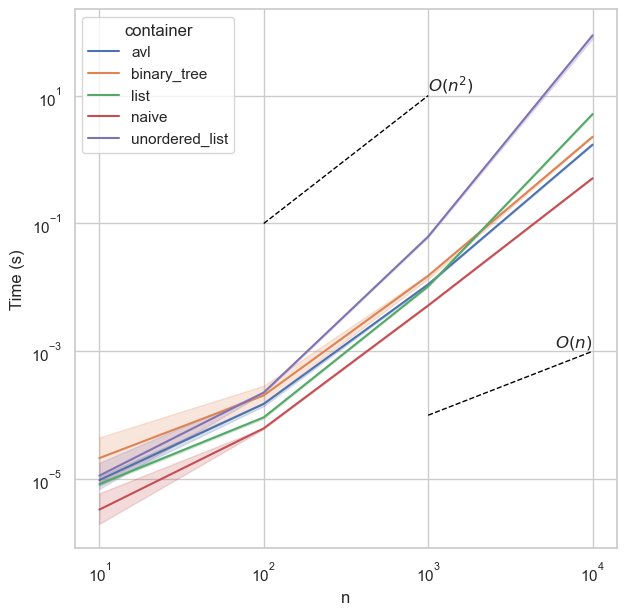

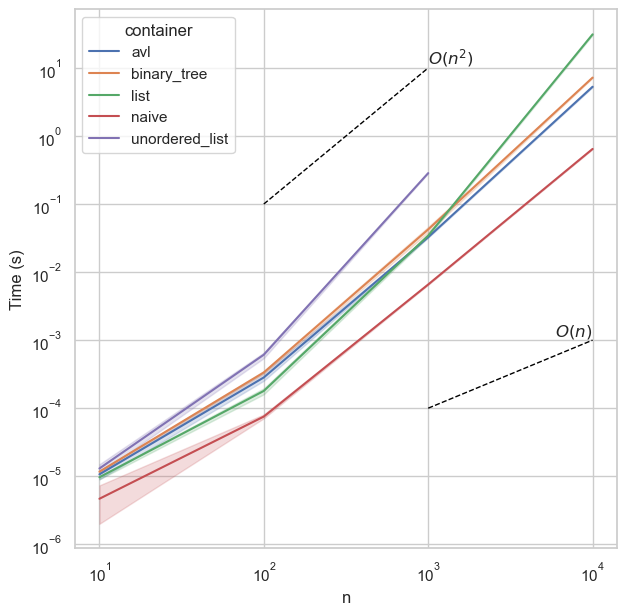

In [26]:
for length, name in zip([0.1, 0.3, 0.6], ["small", "medium", "big"]):
    fig, ax = plt.subplots(1,1, figsize=(7,7))
    sns.lineplot(data=df_random[(df_random.event_container=="heap") & (df_random.length == length)], x="n", y="time", hue="container", ax=ax)

    ax.set(xscale="log", yscale="log")
    ax.set_ylabel("Time (s)")

    y = 1e-1
    xs = [100, 1000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*2)]

    ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
    ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

    y = 1e-4
    xs = [1000, 10000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*1)]

    ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
    ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom", horizontalalignment="right")

    plt.savefig(f"./tex/figs/plot_random_{name}_time.pdf")
    plt.show()


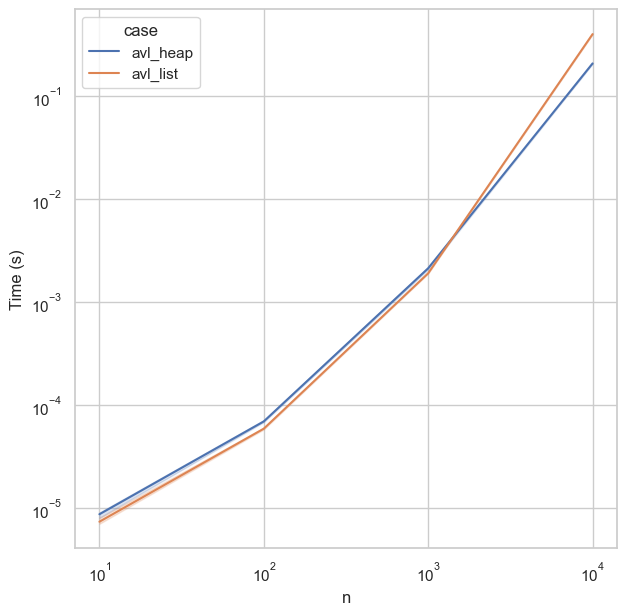

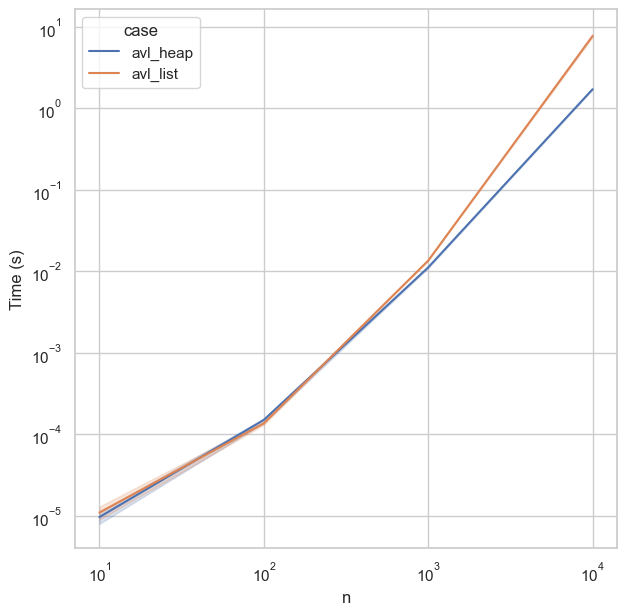

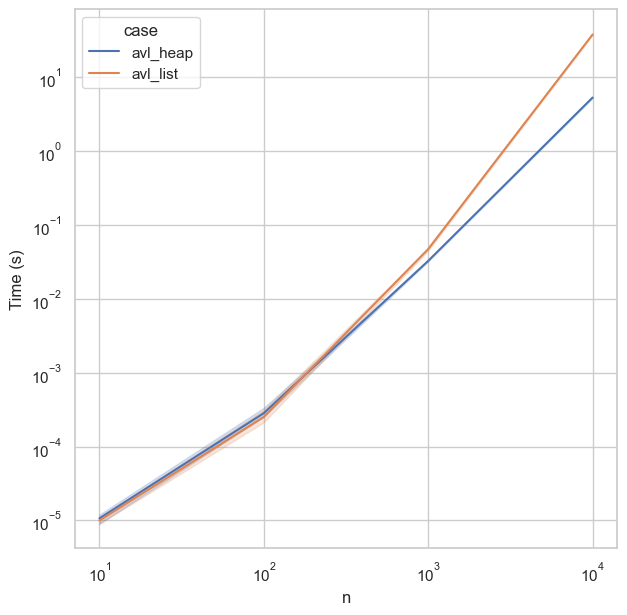

In [31]:
for length, name in zip([0.1, 0.3, 0.6], ["small", "medium", "big"]):
    fig, ax = plt.subplots(1,1, figsize=(7,7))
    sns.lineplot(data=df_random[(df_random.container.isin(["avl"])) & (df_random.length == length)], x="n", y="time", hue="case", ax=ax)

    ax.set(xscale="log", yscale="log")
    ax.set_ylabel("Time (s)")


    plt.savefig(f"./tex/figs/heap_x_list_{name}.pdf")
    plt.show()


In [42]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

row = df_random[(df_random.length==0.1) & (df_random.n==10)].iloc[0]

plt.show()

SyntaxError: cannot assign to attribute here. Maybe you meant '==' instead of '='? (3272624221.py, line 3)

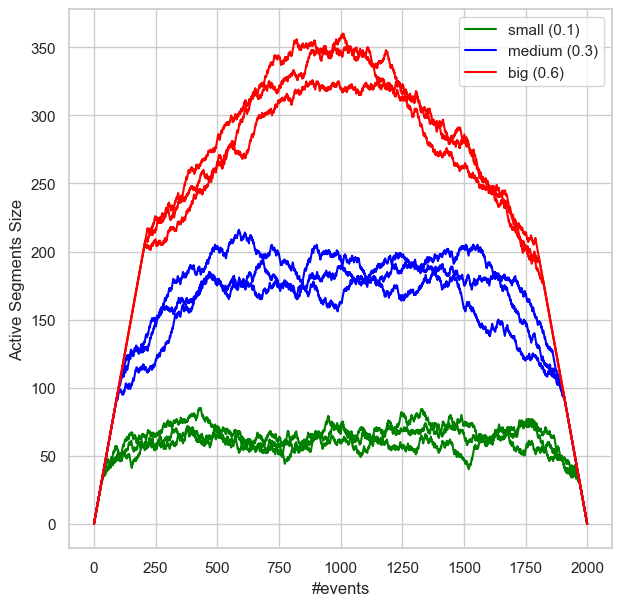

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))

n = 1000

added = False
for row in df[(df.length ==0.1) & (df.n == n) &(df.sort_case=="random_points") & (df.event_container=="heap") & (df.container=="list")].iterrows():
    ax.plot(row[1]['active_elements_size'], color="green", label="small (0.1)" if not added else None)
    added = True

added = False
for row in df[(df.length ==0.3) & (df.n == n) &(df.sort_case=="random_points") & (df.event_container=="heap") & (df.container=="list")].iterrows():
    ax.plot(row[1]['active_elements_size'], color="blue", label="medium (0.3)" if not added else None)
    added = True

added = False
for row in df[(df.length ==0.6) & (df.n == n) &(df.sort_case=="random_points") & (df.event_container=="heap") & (df.container=="list")].iterrows():
    ax.plot(row[1]['active_elements_size'], color="red", label="big (0.6)" if not added else None)
    added = True

ax.legend()
ax.set_xlabel("#events")
ax.set_ylabel("Active Segments Size")

plt.savefig(f"./tex/figs/active_segments_size_{n}.pdf", bbox_inches="tight")

In [14]:

df.sort_case.unique()


array(['box', 'big_segments', 'random_points'], dtype=object)

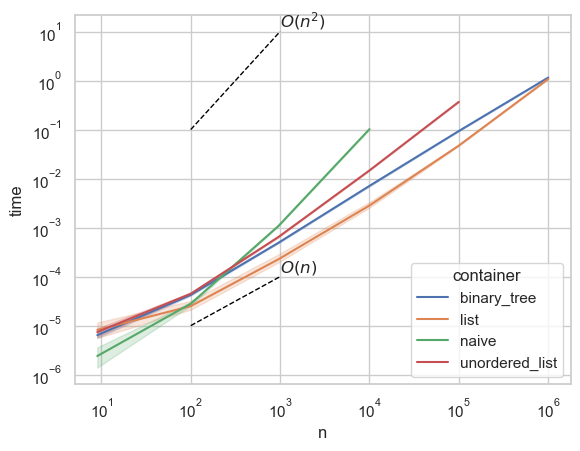

In [16]:
fig, ax = plt.subplots(1, 1)
sns.set_theme(style="whitegrid")
sort_case = "box"





sns.lineplot(data=df[(df.sort_case == sort_case) ], x="n", y="time", ax=ax, hue="container") #, palette=hue_colors)


ax.set(xscale="log", yscale="log")

xs = [100, 1000]; ys = [1e-1, 1e+1]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

xs = [100, 1000]; ys = [1e-5, 1e-4]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom")

xs = [math.pow(10, i) for i in range(1, 7)]
ys = [x*math.log(x)/10000000 for x in xs]

plt.savefig(f"tex/figs/tests_{sort_case}.pdf", bbox_inches='tight', pad_inches=0.0)

plt.show()

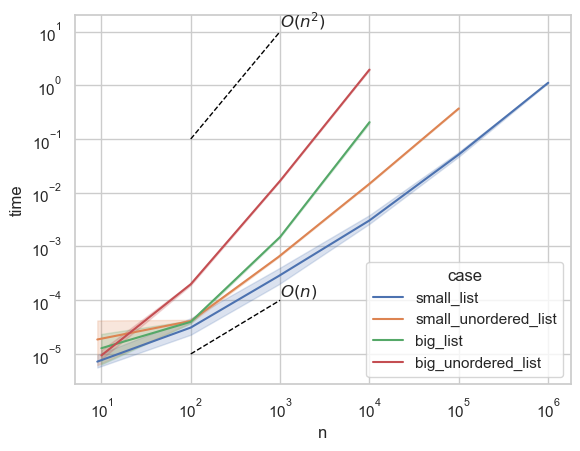

In [9]:
fig, ax = plt.subplots(1, 1)
sns.set_theme(style="whitegrid")
sort_case = "box"
df["case"] = df["sort_case"].replace({"box": "small", "big_segments": "big"}) + "_" + df["container"].astype(str)


df_plot = df[df.case.str.contains("list") &( (df.sort_case == "box") | (df.sort_case == "big_segments"))]
sns.lineplot(data=df_plot, x="n", y="time", ax=ax, hue="case") #, palette=hue_colors)


ax.set(xscale="log", yscale="log")

xs = [100, 1000]; ys = [1e-1, 1e+1]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

xs = [100, 1000]; ys = [1e-5, 1e-4]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom")

xs = [math.pow(10, i) for i in range(1, 7)]
ys = [x*math.log(x)/10000000 for x in xs]

plt.savefig(f"tex/figs/comp_cases.pdf", bbox_inches='tight', pad_inches=0.0)

plt.show()

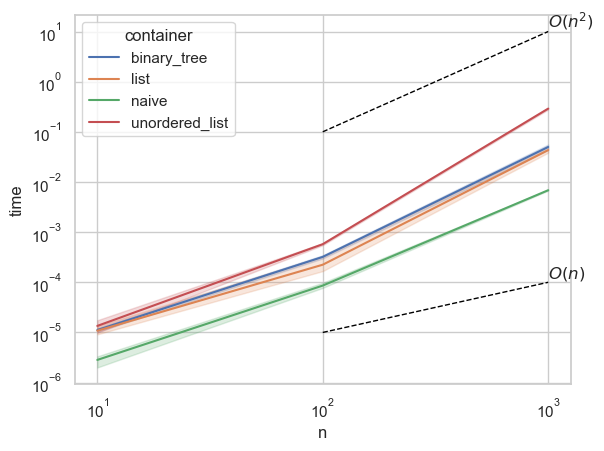

In [10]:

fig, ax = plt.subplots(1, 1)
sns.set_theme(style="whitegrid")
sort_case = "random_points"
sns.lineplot(data=df[(df.sort_case == sort_case) & (df.length > 0.3)], x="n", y="time", ax=ax, hue="container") #, palette=hue_colors)




ax.set(xscale="log", yscale="log")

xs = [100, 1000]; ys = [1e-1, 1e+1]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

xs = [100, 1000]; ys = [1e-5, 1e-4]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom")

xs = [math.pow(10, i) for i in range(1, 7)]
ys = [x*math.log(x)/10000000 for x in xs]

plt.savefig(f"tex/figs/tests_{sort_case}.pdf", bbox_inches='tight', pad_inches=0.0)

plt.show()

In [11]:
df[df.sort_case == "random_points"]

,n,time,sort_case,container,event_container,length,length_std,intersections,segments,active_elements_size,case
193,1000,0.002450,random_points,binary_tree,heap,0.1,0.01,"[[124, 964], [339, 910], [124, 417], [212, 451...","[[0.254533647, 0.771617985, 0.33840967, 0.7704...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",random_points_binary_tree
194,1000,0.002373,random_points,binary_tree,heap,0.1,0.01,"[[396, 909], [45, 100], [24, 909], [30, 349], ...","[[0.902004434, 0.209271958, 0.959004629, 0.110...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",random_points_binary_tree
195,1000,0.002437,random_points,binary_tree,heap,0.1,0.01,"[[753, 941], [90, 217], [145, 753], [361, 924]...","[[0.775620494, 0.200557185, 0.844330652, 0.259...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",random_points_binary_tree
196,100,0.000074,random_points,binary_tree,heap,0.1,0.01,"[[48, 93], [20, 91], [14, 48], [14, 93], [14, ...","[[0.159406725, 0.893209205, 0.189710435, 0.786...","[0, 1, 2, 3, 2, 3, 4, 5, 4, 5, 6, 5, 4, 5, 6, ...",random_points_binary_tree
197,100,0.000075,random_points,binary_tree,heap,0.1,0.01,"[[35, 48], [37, 86], [72, 91], [35, 50], [31, ...","[[0.865479367, 0.295085337, 0.955979922, 0.256...","[0, 1, 0, 1, 2, 3, 4, 5, 6, 5, 6, 7, 8, 9, 8, ...",random_points_binary_tree
...,...,...,...,...,...,...,...,...,...,...,...
404,100,0.000558,random_points,unordered_list,list,0.6,0.01,"[[80, 97], [71, 80], [79, 80], [71, 97], [79, ...","[[-0.0855748991, 0.741383524, 0.480868618, 0.9...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",random_points_unordered_list
405,100,0.000572,random_points,unordered_list,list,0.6,0.01,"[[66, 88], [81, 88], [66, 81], [51, 88], [48, ...","[[0.535172255, -0.0348370355, 0.999440611, 0.3...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",random_points_unordered_list
406,10,0.000009,random_points,unordered_list,list,0.6,0.01,"[[2, 5], [0, 6], [1, 6], [0, 1]]","[[0.912365567, 0.456300735, 1.46828895, 0.7186...","[0, 1, 2, 1, 0, 1, 2, 3, 4, 3, 2, 3, 2, 3, 2, ...",random_points_unordered_list
407,10,0.000009,random_points,unordered_list,list,0.6,0.01,"[[6, 8], [0, 8], [5, 7], [2, 5], [3, 5], [2, 3]]","[[-0.177728316, -0.219069896, 0.241670327, 0.2...","[0, 1, 2, 3, 4, 5, 4, 3, 2, 3, 2, 1, 2, 3, 2, ...",random_points_unordered_list
